In [ ]:
for non_linear data, we use Decision Tree for prediction, and in deciosn tree we use CART algo
CART stands for (Classifcation and Regression Tree Algorithm)
----> CART algo do binary splitting

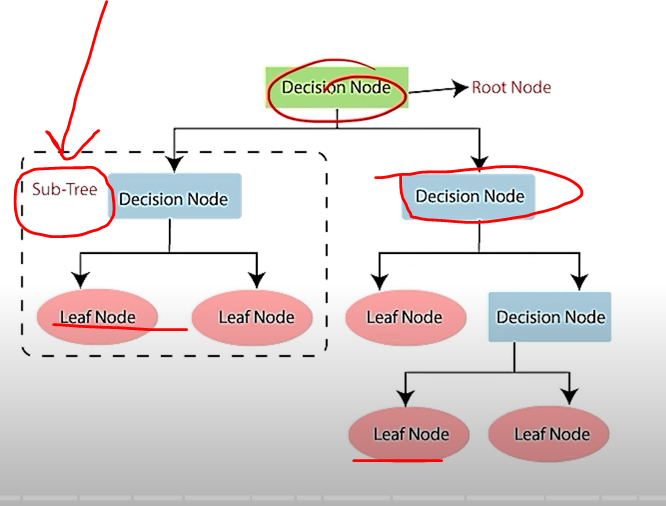

In [1]:
from IPython.display import Image
Image('decision_tree.png', height=300, width=300) 

<h2> decision tree terminologies </h2>

In [ ]:
ROOT NODE: starting point of tree that is further divided into 2 or more homogenous sets
SPLITTING: process of dividing node into 2 or more sub-nodes
decision_node: when a sun-node further divide into 2 or more sub_nodes
LEAF NODE: also called terminal node
PRUNNING: when we remove sub_nodes from tree


# how to select which one is root node ?

In [ ]:
It is via information gain and entropy, the detail of which is shown in FEATURE_SELECTION FOLDER k MUTUAL
INFORMATION CLASSIFICATION vali file m

# practical implementation

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset=dataset.drop(columns=['User ID','Gender'], axis=1)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x=dataset.drop(columns='Purchased', axis=1)
y=dataset['Purchased']

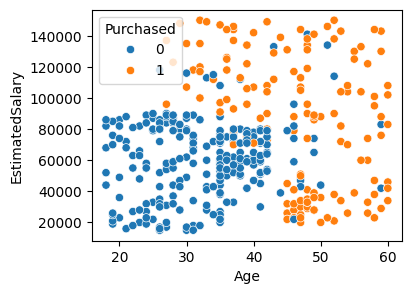

In [4]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)

StandardScaler()

In [6]:
x=pd.DataFrame(ss.transform(x), columns=x.columns)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
ddc=DecisionTreeClassifier()  #here, criterion is gini, we can chnage it to entropy as well.
ddc.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
ddc.score(x_test, y_test)*100

85.0

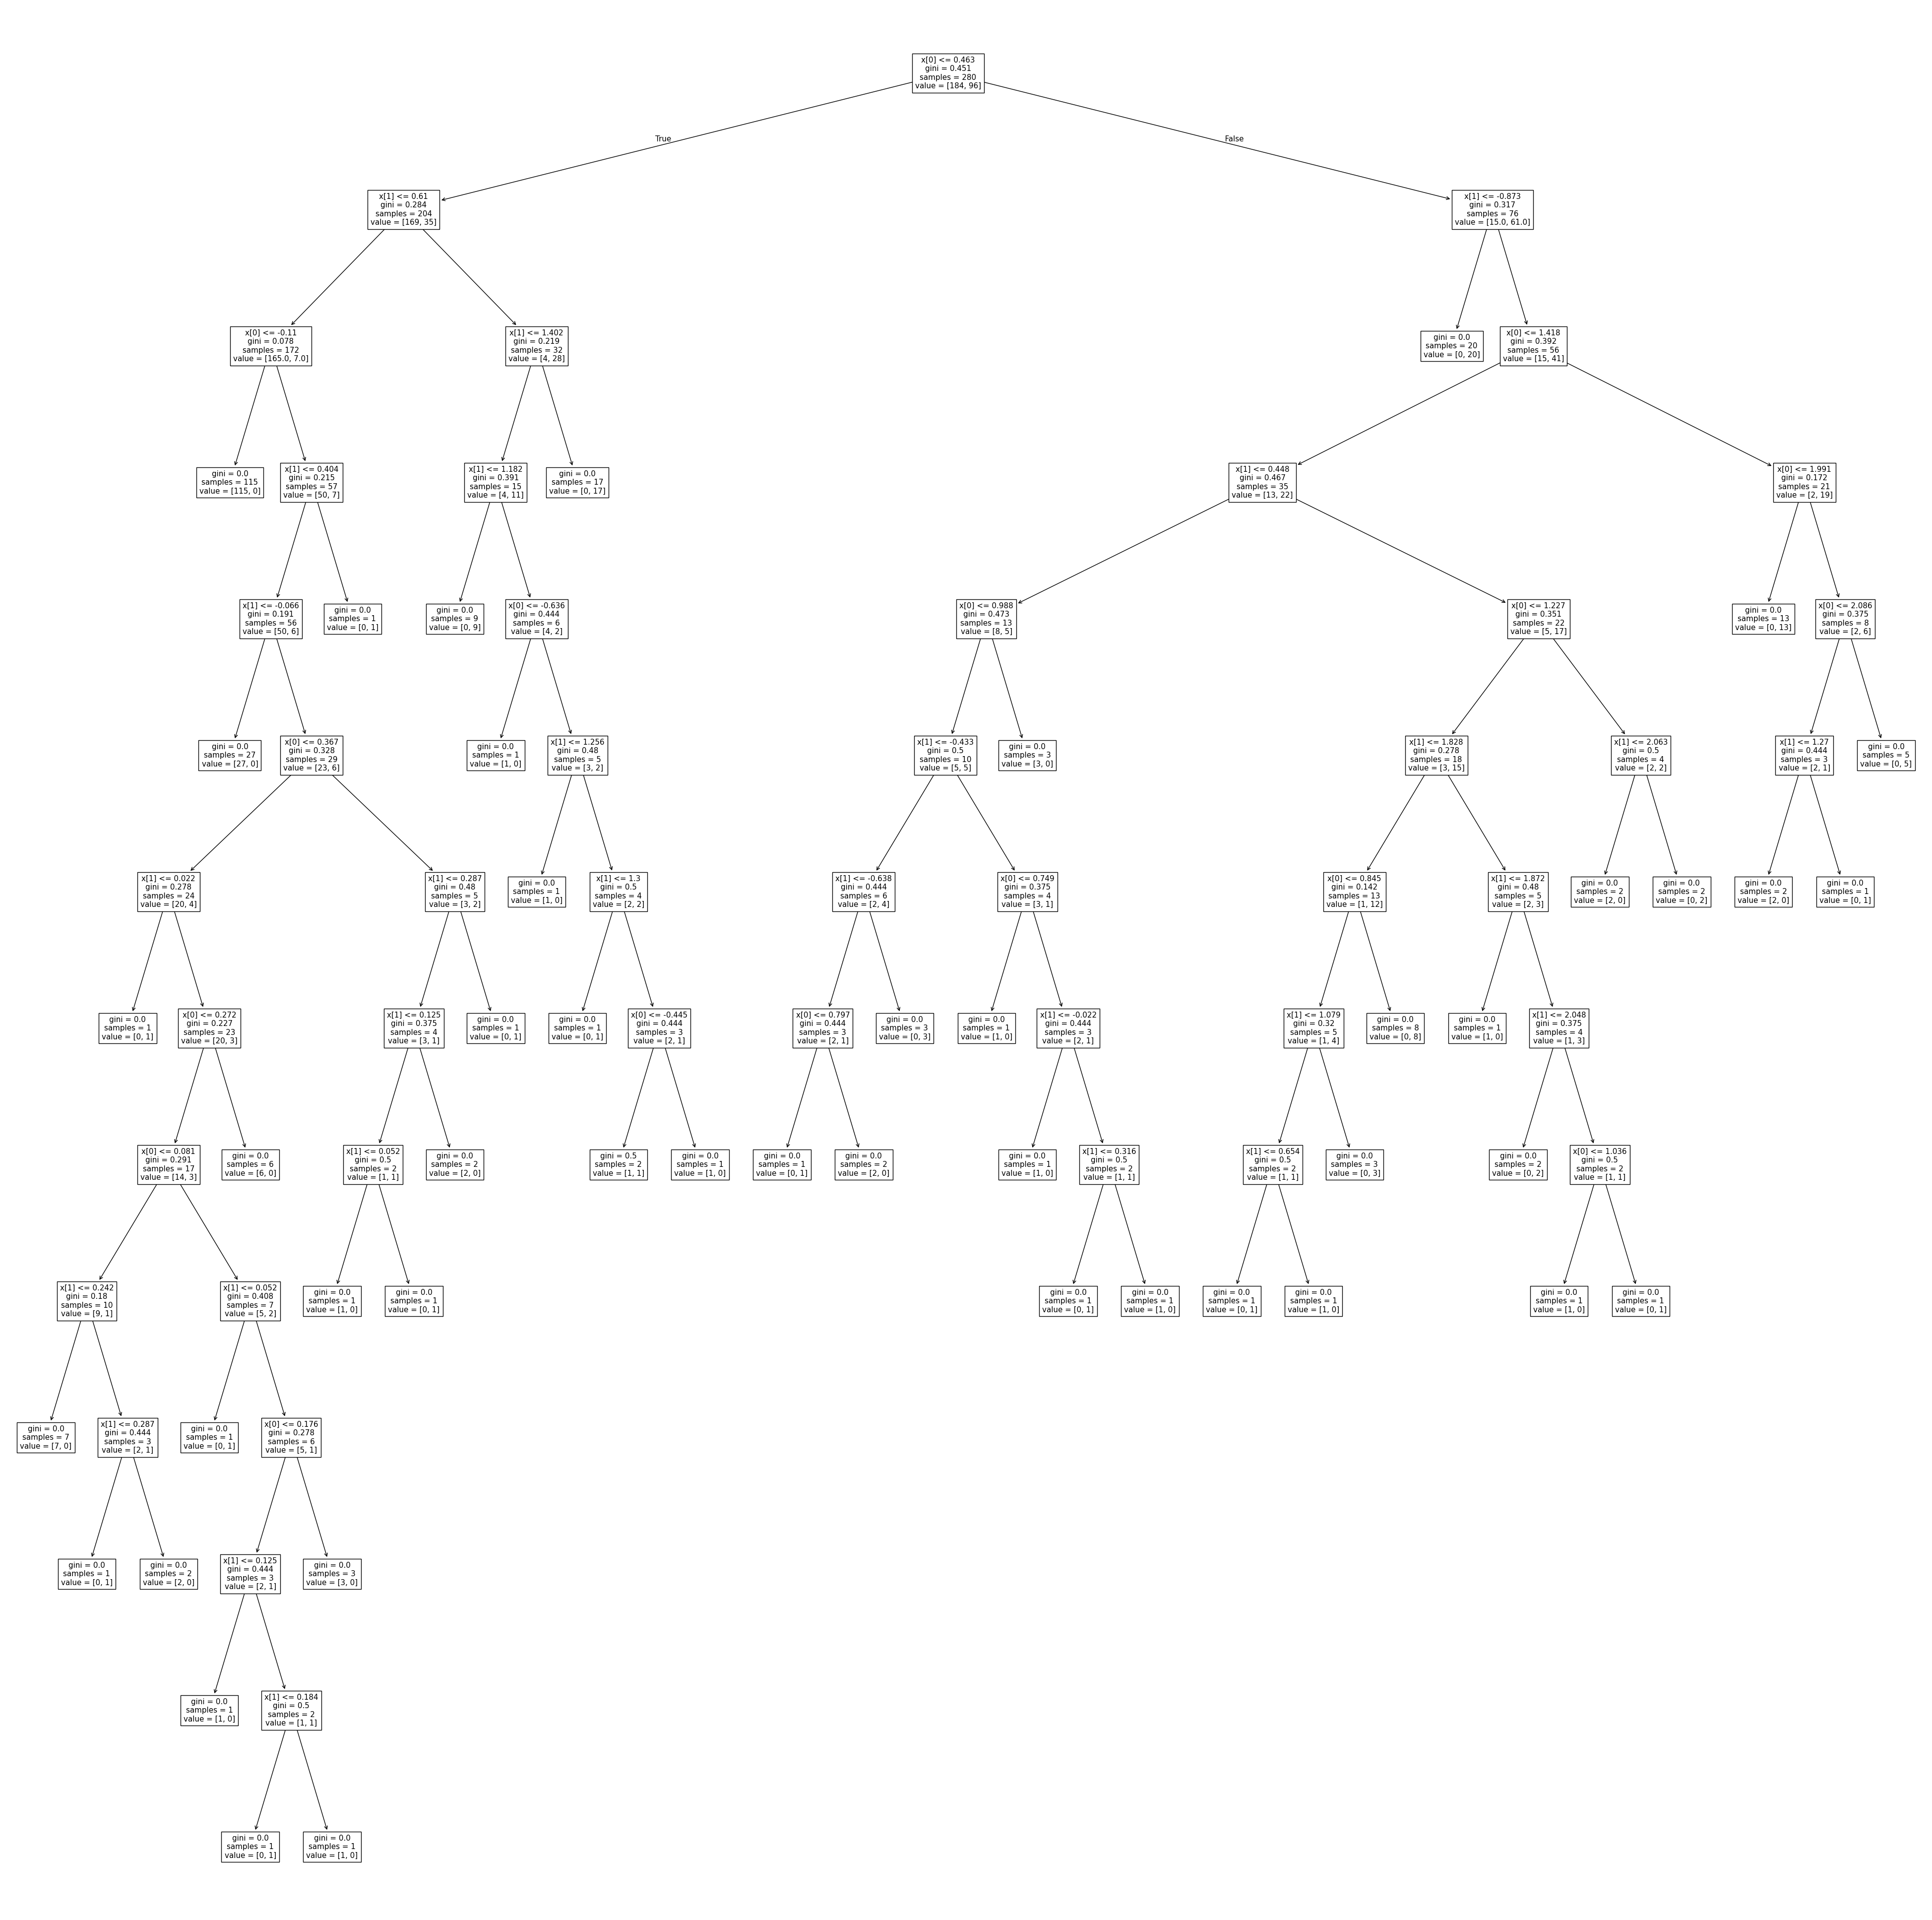

In [16]:
plt.figure(figsize=(50,50))
from sklearn.tree import plot_tree
plot_tree(ddc)
# plt.savefig('tree.png')
plt.show()

C:\Users\J11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


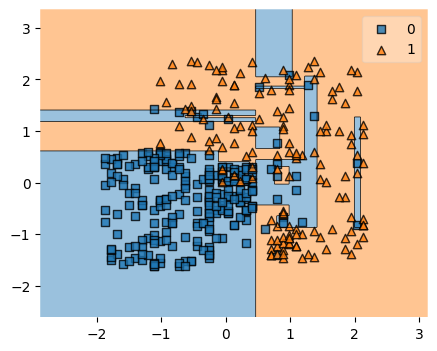

In [24]:
plt.figure(figsize=(5,4))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=ddc)
plt.show()